# Trabajo Práctico Nº2

### Método del descenso

Para resolver un sistema de ecuaciones lineales $Ax=b$, con $A \in \mathbb R^{nxn}$ definida positiva, aplicamos el método del descenso a la función:

$$\begin{equation} J(x)=\frac{1}{2}x^TAx - x^Tb\end{equation}$$

### Ejercicio 1

Implementar una función que reciba una matriz $A \in \mathbb R^{nxn}$, un vector $b \in \mathbb R^n$, un vector $x_0 \in \mathbb R^n$ y un entero
$N > 0$ y aplique $N$ pasos del método del descenso:

<center>
$x^{(k)}=x^{(k-1)}+ \lambda^{(k)} r^{(k)}$, con &nbsp $r^{(k)}=b-Ax^{(k-1)}$ y &nbsp $\lambda^{(k)}=\frac{(r^{(k)})^T r^{(k)}}{(r^{(k)})^T Ar^{(k)}}$
</center>
<br>
El programa debe devolver la aproximación obtenida $x^{(N)}$ y una lista con los errores $\| b-Ax^{(k)} \|_2$ obtenidos en casa paso.
    

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
#defino la funcion para calcular el gradiente de la funcion a minimizar
def grad_f(A, X, b):
    return A @ X - b

#el paso optimo que puedo dar viene dado por la minimizacion de una funcion
#de una variable: una parabola
def paso_optimo(v, X):
    if (v.T @ (A @ v)) == 0:
        #si ya estoy sobre el punto que minimiza la funcion, el paso optimo
        #es no dar ningun paso
        return 0
    else:
        return -((v.T @ ((A @ X) - b))/(v.T @ (A @ v)))

#defino la funcion para calcular el error
def error(A, X, b):
    return np.linalg.norm(b - (A @ X), 2)

#defino la funcion para aplicar el metodo del descenso de gradiente
def descensoGradiente(A, X, b, n):
    #creo la lista de errores y guardo el error inicial
    errores = [error(A, X, b)]
    #realizo n pasos del descenso de gradiente, empezando por el punto X
    for i in range(n):
        #Calculo el -gradiente en el punto, y obtengo el vector director a la
        #recta por la que me movere. Es el residuo
        r = -grad_f(A, X, b)
        #Me muevo un poco sobre esta recta para obtener el nuevo punto X
        #Primero debo calcular el paso optimo a dar por dicha recta
        t = paso_optimo(r, X)
        #me muevo en la direccion dada por v, una magnitud dada por t
        X = r * t + X
        #calculo el error absoluto entre la solucion aproximada y el valor buscado
        errores.append(error(A, X, b))
        #Repito el proceso usando este nuevo punto
    return X, errores

### Ejercicio 2

Aplicar el método en el siguiente ejemplo:
<br>
* $A \in \mathbb R^{10x10}$, $A=M^TM + I$, donde $M \in \mathbb R^{10x10}$ es una matriz con coordenadas aleatorias en $[0,1)$
<br>
* $b \in \mathbb R^{10}$, un vector con coordenadas aleatorias en $[0,1)$
<br>
* $x^{(0)} \in \mathbb R^{10}$, un vector con coordenadas aleatorias en $[0,1)$
<br>
* $N=20$
<br>

Graficar los errores en función del número de pasos.

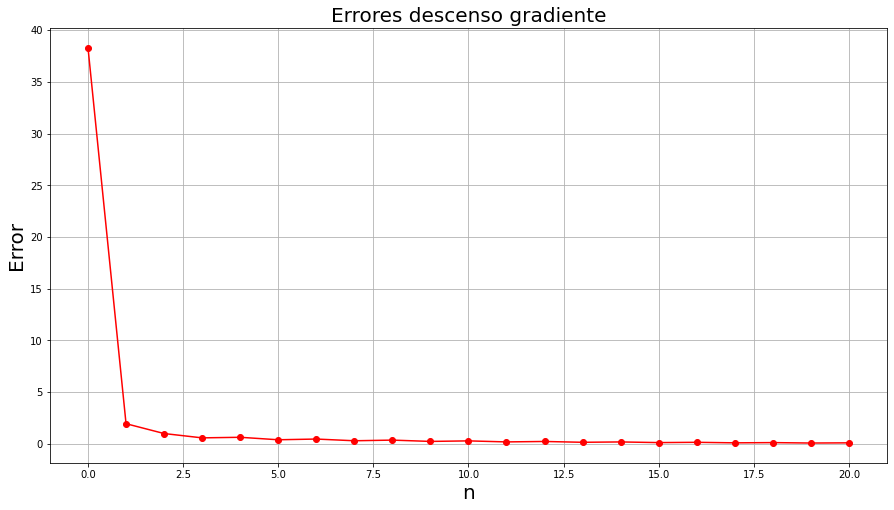

In [62]:
#debo resolver el sistema Ax = b utilizando el metodo del gradiente para
#las matrices indicadas
#creo la matriz M 10x10 aleatoria
M = np.random.rand(10, 10)
#creo la matriz A
A = M.T @ M + np.eye(10)
#creo el vector b
b = np.random.rand(10, 1)
#creo el vector inicial
X_0 = np.random.rand(10, 1)
#aplico el metodo del descenso del gradiente 20 veces
n = 20
res_grad = descensoGradiente(A.copy(), X_0.copy(), b.copy(), n)
#print(res)

#grafico los errores
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(range(n+1), res_grad[1], "o-r")
ax.set_title("Errores descenso gradiente", fontsize=20)
plt.xlabel("n", fontsize=20)
plt.ylabel("Error", fontsize=20)
plt.grid("True")
plt.show()

### Ejercicio 3

($Direcciones$ $A-ortogonales$) Implementar una función que reciba una lista $d$ de vectores y un vector $v$ y devuelva un vector $u$ que sea el resultado de aplicar un paso de la modificación del método *Gram-Schmidt*.

**Gram-Schmidt($d$,$v$,$A$)**:
- $u$ = copia de $v$
- Para $i=1,...,len(d)$:
<br>
$u = u - \frac{v^TAd_i}{d_i^TAd_i}d_i$

In [30]:
def proyeccionVectorial(w, v, A):
    return ((v.T @ (A @ w))/(v.T @ (A @ v))) * v

def gramSchmidt(v, U, A):
    u = v
    for u_i in U:
        u = u - proyeccionVectorial(u, u_i, A)
    return u

### Ejercicio 4

Implementar una función que reciba una matriz $A \in \mathbb R^{nxn}$, un vector $b \in \mathbb R^n$ n vector $x_0 \in R^n$ y aplique n pasos del método del gradiente conjugado.

El programa debe devolver la aproximación obtenida en $x^{(n)}$ y una lista con lo errores $\|b-Ax^{(k)}\|_2$ obtenidos en cada paso.

In [31]:
def paso_optimo_conj(A, r, d):
    if (d.T @ (A @ d)) == 0:
        #si ya estoy sobre el punto que minimiza la funcion, el paso optimo
        #es no dar ningun paso
        return 0
    else:
        return (d.T @ r)/(d.T @ (A @ d))

def gradienteConjugado(A, X, b, n):
    #creo la lista de errores
    errores = [error(A, X, b)]
    #creo la lista que tendra las direcciones conjugadas.
    D = []
    for i in range(n):
        #la direccion en la que me voy a mover es el conjugado del residuo, que
        #viene dado por el -gradiente en el punto, con las proyecciones
        #de los vectores A ortogonales previos quitadas
        r = -grad_f(A, X, b)
        #le quito al vector las direcciones de los vectores a ortogonales previos
        d = gramSchmidt(r, D, A)
        #calculo el paso optimo a dar
        t = paso_optimo_conj(A, r, d)
        #me muevo en esta direccion, con este paso optimo
        X = X + t * d
        #guardo los vectores conjugados en la lista
        D.append(d)
        #calculo el error y lo guardo en la lista de errores
        errores.append(error(A, X, b))
    return X, errores

### Ejercicio 5

Aplicar el método para la matriz $A$ y los vectores $b$ y $x_0$ definidos en el ejercicio 2.
<br>
Graficar los errores en función del número de pasos.
<br>
En base a los resultados obtenidos, ¿cuál de los métodos considera más apropiado para resolver un sistema de ecuaciones lineales?

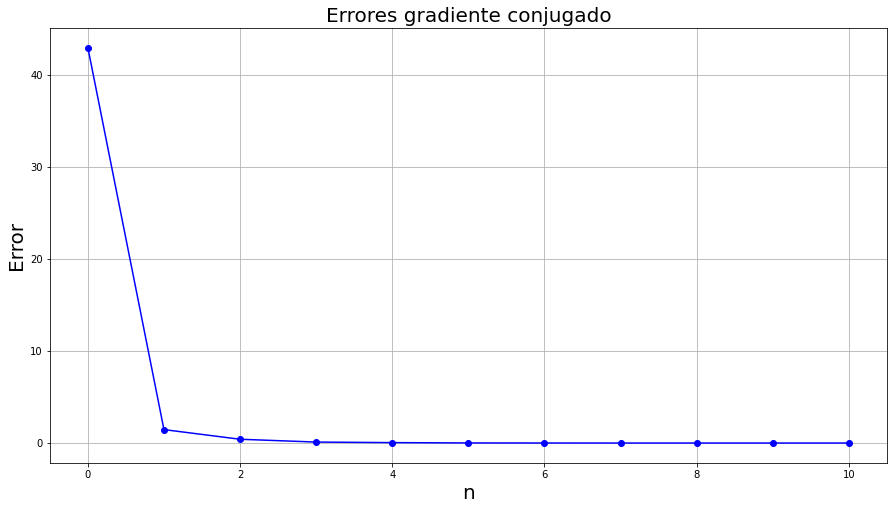

In [63]:
#debo resolver el sistema Ax = b utilizando el metodo del gradiente para
#las matrices indicadas
#creo la matriz M 10x10 aleatoria
M = np.random.rand(10, 10)
#creo la matriz A
A = M.T @ M + np.eye(10)
#creo el vector b
b = np.random.rand(10, 1)
#creo el vector inicial
X_0 = np.random.rand(10, 1)
#aplico el metodo del descenso del gradiente 20 veces
n = 10
res_conj = gradienteConjugado(A.copy(), X_0.copy(), b.copy(), n)
#print(res)

#grafico los errores
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(range(n+1), res_conj[1], "o-b")
ax.set_title("Errores gradiente conjugado", fontsize=20)
plt.xlabel("n", fontsize=20)
plt.ylabel("Error", fontsize=20)
plt.grid("True")
plt.show()

Comparo los dos metodos en el mismo grafico

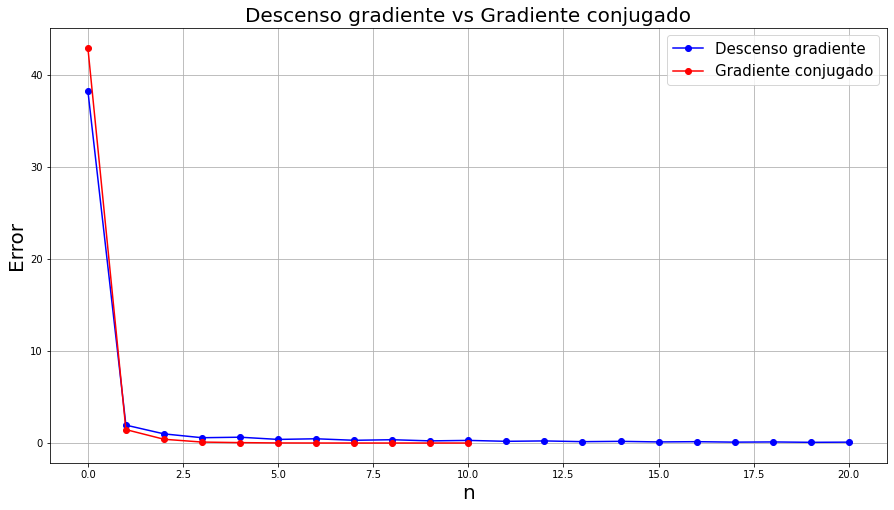

In [64]:
#grafico los errores
fig, ax = plt.subplots(figsize=(15,8))
n = 20 #para el metodo del gradiente hago 20 pasos
ax.plot(range(20+1), res_grad[1], "o-b", label="Descenso gradiente")
n = 10 #para el metodo del gradiente conjugado solo uso 10 pasos, pues a partir de alli el error es tan pequeño
#que trae problemas de division, pues se acerca mucho al 0
ax.plot(range(10+1), res_conj[1], "o-r", label="Gradiente conjugado")
plt.legend(loc="best", fontsize=15)
ax.set_title("Descenso gradiente vs Gradiente conjugado", fontsize=20)
plt.xlabel("n", fontsize=20)
plt.ylabel("Error", fontsize=20)
plt.grid("True")
plt.show()

Vemos que el método del gradiente conjugado llega mucho más rápido a la solución buscada, y de hecho en sucesivos pasos se hace tan pequeño que ocurren errores de representación del mismo, por eso cortamos en n = 10 pasos.